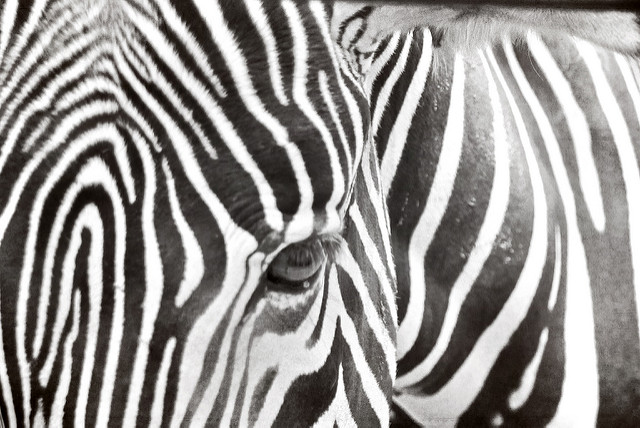

<h2 style="text-align:center;">Welcome to the nineth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to get you familiar with Linear Regression models<br/>
<br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory09". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_09_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr/>

Today you will use 2 linear regression models from different packages (almost different)
<br/><br/>
<li><code>LinearRegression()</code>from <b> sklearn</b> package</li>
<li><code>OLS()</code> (Ordinary Least Squares) from <b> statmodels</b> package</li>


You can find official documentation for each model 
<br/>
[here](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/statistical_inference/supervised_learning.html#linear-regression)
<br/>
[here](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)


<b><span style="font-size:20px; color:orange">A</span>wesome</b>, now let's get started with laboratory work

<b>First things first,</b> import <code>pandas</code>, <code>sklearn</code>, <code>statmodels</code>, <code>numpy</code> and <code>matplotlib</code>packages to your notebook

In [2]:
# Import packages  pandas, numpy, matplotlib or seaborn here
import pandas as pd
import pandas.util.testing as tm
import numpy  as np
import seaborn as sns

If you haven't install sklear package on your laptop - run the cell below before you will import packages

In [3]:
# run this cell

# LinearRegression()  model can be used from linear_model module
from sklearn import linear_model

# OSL() model can be used from statmodels package
import statsmodels.api as sm

# we will perform sampling using train_test_split module for training and testin set
# and we will use GridSearchCV to find the best parameters for SGDRegressor()
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

# we will evaluate our models using RMSE(mean_squared_error) and Determination coefficient(r2_score)
from sklearn.metrics import mean_squared_error, r2_score

# in case you will use polinominal features
from sklearn.preprocessing import PolynomialFeatures

<b><span style="font-size:20px; color:orange">G</span>reat!</b>
<br/>
<b>Now</b> let's start with tasks:
<br/> 

<h3>TASK 1: DATAFRAME</h3>

<b>Task 1.1</b> Read csv file into dataframe, perform info(), head(), describe and any other necessary first step function

In [5]:
# Read your CSV file here
data = pd.read_csv('Lemonade.csv')

In [6]:
# Get first look at your data
data.shape

(365, 7)

In [7]:
# Get first look at your data
data.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


In [8]:
# Get first look at your data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 17.2+ KB


In [18]:
data.isnull().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

In [10]:
# Get first look at your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,60.731233,16.196266,15.10,49.70,61.10,71.30,102.9
Rainfall,365.0,0.826603,0.273171,0.47,0.65,0.74,0.91,2.5
Flyers,365.0,40.284932,13.178651,9.00,31.00,39.00,49.00,80.0
Price,365.0,0.333973,0.075206,0.30,0.30,0.30,0.30,0.5
Sales,365.0,25.323288,6.893589,7.00,20.00,25.00,30.00,43.0


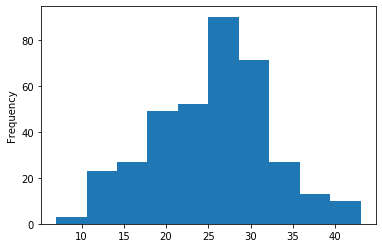

In [13]:
data.Sales.plot(kind = 'hist')

How is your data doing? 
<br/> Do you have any <b>NaNs</b>? Categorical values? 
<br/>Inconsistent data formats - strings instead of float or int, for example?

Keep in mind - you will fit linear models today (based on math) and you cannot fit categorical data without encoding neither NaNs.

<h3> TASK 2: DATA PREPARATION</h3>

Prepare your data - <b>drop</b> or <b>restore</b> NaNs, outliers, fix inconsistent formats if any, divide your data into 2 groups - <b>categorical data</b> and <b>numerical data</b>. 
<br/>I highly recomend your to create 2 lists with column names as categorical() and numerical().

In [ ]:
# Drop or restore Nans


In [ ]:
# Drop or restore Nans


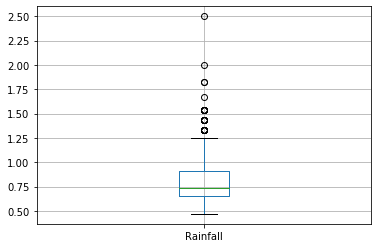

In [21]:
# Drop outliers
data[['Rainfall']].boxplot()

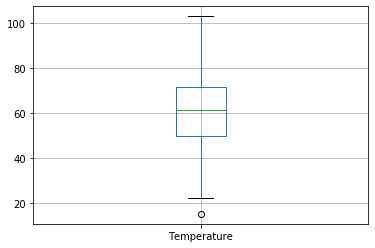

In [23]:
data[['Temperature']].boxplot()

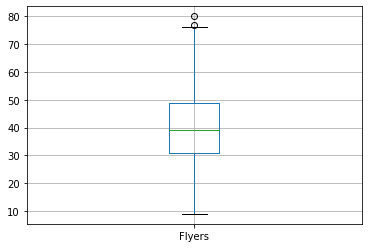

In [24]:
data[['Flyers']].boxplot()

In [26]:
data.Price.unique()

array([0.3, 0.5])

In [22]:
data.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [29]:
data.drop(data[data.Flyers > 76].index, inplace = True)

In [32]:
# Any inconsistent data formats - fix them
data.Date = pd.to_datetime(data.Date, dayfirst=True )

In [ ]:
# Categorical features
cat = ['Date', 'Day']

In [33]:
# Numerical features
num = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

<b>Great job!</b>
<br/> Let's move on now
<hr/>

<h3> TASK 2.2: MORE DATA PREPARATION</h3>

Usually you train(fit) your model on train data and then test your model on test data. It's really bad, baad idea to train and test on the same data - you model will simply overfit on train set. 
<br/> 
<b>So,</b> lets divide our data into two parts - <b>train part(70-80%) </b>and <b>test part(20-30%).</b>
<br/>
On Laboratory work 6 you have learned how to random sample your data, and you can use that function here, but to save your time I recommend you to use <code>train_test_split()</code> model.
<br/>
As it says, this model will divide our data into 4 parts - independent variables for train set, target variable for train set, independent variables for test set, target variable for test set. 
<br/>
<b>Aham - before you have to divide your data into independent variables and target variables, or simply X and Y.<b>

<h4>For this task you can use only numerical data, unless you already have encoded your categorical data. If you didn't - don't worry you will do it on task 4</h4>

TARGET VALUE - <b>Sales</b>

In [105]:
# your X dataframe - independent variables
X = data[['Temperature', 'Rainfall_mod', 'Flyers', 'Price']].copy()

In [85]:
data_1.head(2)

,Temperature,Rainfall,Flyers,Price,Sales
0,0.830047,0.061485,0.461137,0.009223,0.307425
1,0.823676,0.037906,0.427514,0.008550,0.370512


In [106]:
Y = data[['Sales']].copy()

Features: 'Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price'
<br/>
Target Value: 'Sales'

In [107]:
# Now, check the shapes, run this cell
X.shape, Y.shape

((363, 4), (363, 1))

In [108]:
# run this cell, but before, ensure you have divided your initial data into X and Y dataframes
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42 )

In [109]:
# Check shapes of new datasets, run this cell
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((254, 4), (254, 1), (109, 4), (109, 1))

<h3> TASK 3: MODELS</h3>

<b> Task 3.1</b> OLS() model. Carefully eximine each cell and run it.

In [ ]:
x_train_ols =  sm.add_constant(x_train)

In [39]:
# run this cell
ols_model = sm.OLS(y_train, x_train, missing="drop").fit()

In [40]:
# run this cell
y_predicted_ols=ols_model.predict(x_test)

In [41]:
y_predicted_ols.shape, y_test.shape

((109,), (109, 1))

Awesome, 
<br/>
<b>R-squared</b> is also called the coefficient of determination. It’s a statistical measure of how well the regression line fits the data.

As you see before - to train your model you have to <b>use fit()</b> function, literally - put your data into model, with x_train and y_train - your model 'teaches' itsel to produce results as close as possible to y_train using x_train. 
<br/> Well, not really 'teaches' - let's say adjustes its coefficients and runs math-c machine to create as perfect as possible model (equation) 

<b> Task 3.2</b> LinearRegression() model. Carefully eximine each cell and run it.

In [110]:
# Create the instance of your model - run this cell
lr_model = linear_model.LinearRegression()

In [111]:
# train it - run this cell
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# predict your target value - y's
y_predicted_ls = lr_model.predict(x_test)

<b> Task 3.3</b> Now, lets evaluate how good your models are. Compare 

In [45]:
# run this cell
print("MSE of OLS() vs LinearRegression():\n")
mean_squared_error(y_test, y_predicted_ols), mean_squared_error(y_test, y_predicted_ls)

MSE of OLS() vs LinearRegression():



(0.8571395189731483, 0.7903426494182272)

In [46]:
# run this cell
print("R-square of OLS() vs LinearRegression():\n")
r2_score(y_test, y_predicted_ols), r2_score(y_test, y_predicted_ls)

R-square of OLS() vs LinearRegression():



(0.9804736880581206, 0.9819953732479868)

Which model performs better? <br/> How did you know that?

Let's see details about our models:

In [47]:
# run this cell
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.769e+04
Date:                Fri, 17 Apr 2020   Prob (F-statistic):                        0.00
Time:                        16:05:06   Log-Likelihood:                         -349.61
No. Observations:                 254   AIC:                                      707.2
Df Residuals:                     250   BIC:                                      721.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.3956      0.007     58.876      0.000       0.382       0.409
Rainfall       -0.6524      0.166     -3.942      0.000      -0.978      -0.326
Flyers          0.0260      0.008      3.425      0.001       0.011       0.041
Price           2.2359      0.961      2.328      0.021       0.344       4.128
==============================================================================
Omnibus:                      104.767   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.820
Skew:                           0.108   Prob(JB):                     0.000605
Kurtosis:                       1.837   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
# run this cell
lr_model.coef_

array([[-1.5668519 , -0.30052731, -1.07803044,  1.60256068]])

y = 0.371 * Temperature + (-2.178 * Rainfall) + 0.021 * Flyers + 2.293 * Price + 2.894

In [93]:
lr_model.intercept_

array([2.11267344])

<h3> Underfit ? Overfit</h3>

In [113]:
print('Score on train set:', lr_model.score(x_train, y_train))

Score on train set: 0.991636230329169


In [114]:
print('Score on test set:', lr_model.score(x_test, y_test))

Score on test set: 0.9907315693895881


In [65]:
print('No Underfit Neighter Overfit')

No Underfit Neighter Overfit


<hr/>

<h2> Dummy Model</h2>

In [63]:
lr_model.score(x_test, y_test)

0.9819953732479868

<hr/>

Proceed to Task 3.4 if you feel yourself very comfortable with today's laboratory work. If not - you can complete it next week

<b> Task 3.4* </b> Cheaking the goodnes of model just by scores on test data is good, but not enough - our model can....overfit or underfit

[Read mode here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html?highlight=overfitting) - use cross validation without pipeline (not really need it now)

In [ ]:
# run this cell 
from sklearn.model_selection import cross_val_score

In [ ]:
# check on overfit of OLS model


In [ ]:
# check on overfit of LS model


Compare the coefficients.

<b><span style="font-size:14px; color:orange">G</span>reat!</b>
<br/>
<b>Now</b> let's think how to improve our model:
<br/> 

<h3> TASK 4: ITS ALL ABOUT DATA</h3>

<b> Task 4.1 </b> Encode your categorical features to fit them into the model

In [ ]:
# Your text goes here

In [ ]:
# Your text goes here

<b> Task 4.2 </b> Analyze correlation coefficients - to see if there any features you better exclude from model

In [96]:
# Your text goes here
data.corr()

,Temperature,Rainfall,Flyers,Price,Sales
Temperature,1.000000,-0.903569,0.792071,0.506010,0.989628
Rainfall,-0.903569,1.000000,-0.748171,-0.382439,-0.910159
Flyers,0.792071,-0.748171,1.000000,0.402779,0.799306
Price,0.506010,-0.382439,0.402779,1.000000,0.513235
Sales,0.989628,-0.910159,0.799306,0.513235,1.000000


In [97]:
# Your text goes here
data.corr(method = 'spearman')

,Temperature,Rainfall,Flyers,Price,Sales
Temperature,1.000000,-0.979520,0.770946,0.527383,0.987016
Rainfall,-0.979520,1.000000,-0.780766,-0.540295,-0.991931
Flyers,0.770946,-0.780766,1.000000,0.397302,0.781209
Price,0.527383,-0.540295,0.397302,1.000000,0.540151
Sales,0.987016,-0.991931,0.781209,0.540151,1.000000


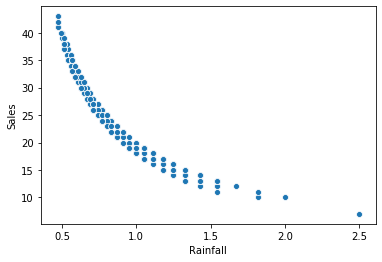

In [99]:
sns.scatterplot(data.Rainfall, data.Sales)

In [100]:
data['Rainfall_mod'] = 1 / data.Rainfall

In [102]:
data['Rainfall_log'] = np.log(data.Rainfall)

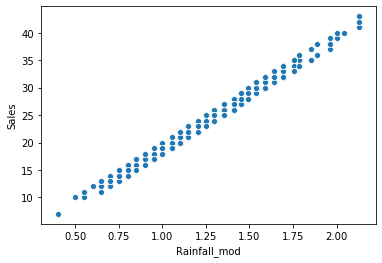

In [104]:
sns.scatterplot(data.Rainfall_mod, data.Sales)

In [116]:
data['Month'] = data.Date.dt.month

In [119]:
data['Day_'] = data.Day.map({'Sunday':7, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5,
       'Saturday':6})

In [118]:
data.Day.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [120]:
data.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Rainfall_mod,Rainfall_log,Month,Day_
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,0.500000,0.693147,1,7
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,0.751880,0.285179,1,1
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,0.751880,0.285179,1,2
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,0.952381,0.048790,1,3
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,1.000000,0.000000,1,4


In [69]:
data_1 = pd.DataFrame(preprocessing.normalize(data[num]))

In [71]:
data_1.columns = num

In [72]:
data_1.head()

,Temperature,Rainfall,Flyers,Price,Sales
0,0.830047,0.061485,0.461137,0.009223,0.307425
1,0.823676,0.037906,0.427514,0.008550,0.370512
2,0.744720,0.028710,0.582825,0.006476,0.323791
3,0.802614,0.019110,0.509596,0.005460,0.309398
4,0.748149,0.017645,0.582286,0.005294,0.317611


<b> Task 4.3 </b> Analyze data - if you can use polynomial features [read more](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

In [ ]:
# Your text goes here

In [ ]:
# Your text goes here

In [ ]:
# Your text goes here

<b> Task 4.4 </b> Re-train your models with updated data and compare the metrics

In [ ]:
# train LinearRegression model


In [ ]:
# predict with OLS

In [ ]:
# predict with LinearRegression

In [ ]:
# compare their metrics

<h3> TASK 5: CROSS - VALIDATION</h3>

In [ ]:
# your text goes here

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

In [15]:
skbest = SelectKBest(score_func=f_regression, k = 5)

In [16]:
import pandas as pd

In [17]:
df = pd.read_excel('Real_estate_valuation_data_set.xlsx')

In [18]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [21]:
skbest.fit(X, y)

SelectKBest(k=5, score_func=<function f_regression at 0x1296EDA8>)

In [35]:
ind = skbest.get_support()

In [36]:
X.columns[ind]

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [19]:
X = df.iloc[:, :-1]

In [20]:
y = df['Y house price of unit area']

In [ ]:
# your text goes here

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! 
<b>Now</b> go to the MCQ_post_lab
<br/> 